## Data Cleaning

Reading in the csv

In [1]:
import numpy as np, pandas as pd, re, seaborn as sns, matplotlib.pyplot as plt, datetime, time, os
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer as cntvec
from sklearn.feature_extraction.text import TfidfTransformer as tftrans
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow_hub as hub

W0403 23:13:20.933487  4076 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [2]:
alltweets = pd.read_csv(r"C:\Users\jmoore42\Documents\politcian_data.csv")


In [34]:
def totalminutes(t1, t2):
    diff = t2-t1
    try:
        mins = diff.hours*60+diff.minutes+diff.seconds/60
    except : 
        pass
    
    try:
        mins = diff.minutes+(diff.seconds/60)
    except : 
        mins = diff.seconds/60
    return round(mins,5)

In [64]:
type(alltweets['Comments'][800])

list

Creating functions that clean the text and export polarity

In [61]:
def Convert(string): 
    li = list(string.split("', '")) 
    return li
for x in range(0, len(alltweets['Comments'])):
    try:
        alltweets['Comments'][x] = Convert(alltweets['Comments'][x])
    except:
        print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [7]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    return analysis.sentiment.polarity 


In [65]:
badwords = """4r5e 5h1t 5hit a55 anal anus ar5e arrse arse ass ass-fucker asses assfucker assfukka asshole assholes asswhole a_s_s b!tch b00bs b17ch b1tch ballbag balls ballsack bastard beastial beastiality bellend bestial bestiality bi+ch biatch bitch bitcher bitchers bitches bitchin bitching bloody blow job blowjob blowjobs boiolas bollock bollok boner boob boobs booobs boooobs booooobs booooooobs breasts buceta bugger bum bunny fucker butt butthole buttmuch buttplug c0ck c0cksucker carpet muncher cawk chink cipa cl1t clit clitoris clits cnut cock cock-sucker cockface cockhead cockmunch cockmuncher cocks cocksuck  cocksucked  cocksucker cocksucking cocksucks  cocksuka cocksukka cok cokmuncher coksucka coon cox crap cum cummer cumming cums cumshot cunilingus cunillingus cunnilingus cunt cuntlick  cuntlicker  cuntlicking  cunts cyalis cyberfuc cyberfuck  cyberfucked  cyberfucker cyberfuckers cyberfucking  d1ck damn dick dickhead dildo dildos dink dinks dirsa dlck dog-fucker doggin dogging donkeyribber doosh duche dyke ejaculate ejaculated ejaculates  ejaculating  ejaculatings ejaculation ejakulate f u c k f u c k e r f4nny fag fagging faggitt faggot faggs fagot fagots fags fanny fannyflaps fannyfucker fanyy fatass fcuk fcuker fcuking feck fecker felching fellate fellatio fingerfuck  fingerfucked  fingerfucker  fingerfuckers fingerfucking  fingerfucks  fistfuck fistfucked  fistfucker  fistfuckers  fistfucking  fistfuckings  fistfucks  flange fook fooker fuck fucka fucked fucker fuckers fuckhead fuckheads fuckin fucking fuckings fuckingshitmotherfucker fuckme  fucks fuckwhit fuckwit fudge packer fudgepacker fuk fuker fukker fukkin fuks fukwhit fukwit fux fux0r f_u_c_k gangbang gangbanged  gangbangs  gaylord gaysex goatse God god-dam god-damned goddamn goddamned hardcoresex  hell heshe hoar hoare hoer homo hore horniest horny hotsex jack-off  jackoff jap jerk-off  jism jiz  jizm  jizz kawk knob knobead knobed knobend knobhead knobjocky knobjokey kock kondum kondums kum kummer kumming kums kunilingus l3i+ch l3itch labia lmfao lust lusting m0f0 m0fo m45terbate ma5terb8 ma5terbate masochist master-bate masterb8 masterbat* masterbat3 masterbate masterbation masterbations masturbate mo-fo mof0 mofo mothafuck mothafucka mothafuckas mothafuckaz mothafucked  mothafucker mothafuckers mothafuckin mothafucking  mothafuckings mothafucks mother fucker motherfuck motherfucked motherfucker motherfuckers motherfuckin motherfucking motherfuckings motherfuckka motherfucks muff mutha muthafecker muthafuckker muther mutherfucker n1gga n1gger nazi nigg3r nigg4h nigga niggah niggas niggaz nigger niggers  nob nob jokey nobhead nobjocky nobjokey numbnuts nutsack orgasim  orgasims  orgasm orgasms  p0rn pawn pecker penis penisfucker phonesex phuck phuk phuked phuking phukked phukking phuks phuq pigfucker pimpis piss pissed pisser pissers pisses  pissflaps pissin  pissing pissoff  poop porn porno pornography pornos prick pricks  pron pube pusse pussi pussies pussy pussys  rectum retard rimjaw rimming s hit s.o.b. sadist schlong screwing scroat scrote scrotum semen sex sh!+ sh!t sh1t shag shagger shaggin shagging shemale shi+ shit shitdick shite shited shitey shitfuck shitfull shithead shiting shitings shits shitted shitter shitters  shitting shittings shitty  skank slut sluts smegma smut snatch son-of-a-bitch spac spunk s_h_i_t t1tt1e5 t1tties teets teez testical testicle tit titfuck tits titt tittie5 tittiefucker titties tittyfuck tittywank titwank tosser turd tw4t twat twathead twatty twunt twunter v14gra v1gra vagina viagra vulva w00se wang wank wanker wanky whoar whore willies willy xrated xxx""" 

In [66]:
list_ = np.array(badwords.split(" "))

In [67]:
list_=list_[np.where(list_!="")]
todelete = list()
for x in range(0,len(list_)-1):
    if len(list_[x])<3:
        todelete.append(x)
list_ = np.delete(list_, todelete)

In [68]:
alltweets['Swear_Comments1'] = np.NaN
for tweet in range(0, len(alltweets['Comments'])):
    naughtycount = list()
    for x in range(0, len(alltweets['Comments'][tweet])):
        naughtycount.append(any(word in alltweets['Comments'][tweet][x] for word in list_))
    alltweets['Swear_Comments1'][tweet] = np.mean(naughtycount)


In [69]:
alltweets['Sent_dists'] = ""
alltweets['Dists_nonneutral'] = ""
alltweets['Mean_Sentiment'] = np.NaN
alltweets['SD_Sentiment'] = np.NaN
alltweets['Mean_Sentiment+-'] = np.NaN
alltweets['SD_Sentiment+-'] = np.NaN

for x in range(0, len(alltweets['Comments'])):
    if alltweets['Comments'][x]!= ['[]']:
        tweet = alltweets['Comments'][x]
        dist = list()
        for y in range(0,len(tweet)):
            dist.append(analyze_sentiment(tweet[y]))
        dist = np.array(dist)
        alltweets['Sent_dists'][x] = dist
        alltweets['Dists_nonneutral'][x] = dist[np.where(dist!=0)]
    try:
        alltweets['Mean_Sentiment'][x] = np.mean(alltweets['Sent_dists'][x])
    except: 
        alltweets['Mean_Sentiment'][x] = np.NaN
    try:
        alltweets['SD_Sentiment'][x] = np.std(alltweets['Sent_dists'][x])  
    except:
        alltweets['SD_Sentiment'][x] = np.NaN
    try:
        alltweets['Mean_Sentiment+-'][x] = np.mean(alltweets['Dists_nonneutral'][x])
    except: 
        alltweets['Mean_Sentiment'][x] = np.NaN
    try:
        alltweets['SD_Sentiment+-'][x] = np.std(alltweets['Dists_nonneutral'][x])  
    except:
        alltweets['SD_Sentiment'][x] = np.NaN
    

alltweets['Comment_Count'] = [len(x) for num, x in enumerate(alltweets['Dists_nonneutral'])]



### Feature Engineering

In [70]:
#tweet sentiment
cleaned = [clean_tweet(tweet) for tweet in alltweets['Text']] 
alltweets['Text'] = [tweet.replace(" amp "," and ") for tweet in cleaned] #this replaces amp (&) with and
alltweets['Tweet_Sent'] = np.NaN
for x in range(0,len(alltweets['Text'])):
    alltweets['Tweet_Sent'][x] = analyze_sentiment(alltweets['Text'][x])
               
#Dummy variables for weekday
alltweets['Weekday'] = [datetime.datetime.strptime(tweet, '%Y-%m-%d %H:%M:%S').weekday() for tweet in alltweets['Date']]
wkkeys = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
alltweets['Weekday_Word'] = [wkkeys[day] for day in alltweets.Weekday]
weekday_dummies = pd.get_dummies(pd.DataFrame(alltweets['Weekday']),drop_first=True)

#Dummy variables for User Name               

userdummies = pd.get_dummies(alltweets['User_Name'],drop_first=True)
alltweetstest = pd.concat([alltweets, userdummies,weekday_dummies], axis=1)
               

#
    

NameError: name 'getdummies' is not defined

Using vectorizor to get word counts for tweets (high-frequency words will be used as features, excluding the most common words)

In [219]:
vectorizer = cntvec()

result = vectorizer.fit_transform(alltweets['Text'])
wordtallys = pd.DataFrame(data=result.toarray(),columns=vectorizer.get_feature_names())
todrop = list()
mincount = .03
maxcount = np.percentile(wordtallys.mean(),99.7)
for x in range(0, len(wordtallys.columns)):
    if wordtallys.iloc[:,x].mean() < mincount:
        todrop.append(x)
    if wordtallys.iloc[:,x].mean() > maxcount:
        todrop.append(x)

shorttallys = wordtallys.drop(wordtallys.columns[todrop], axis=1)


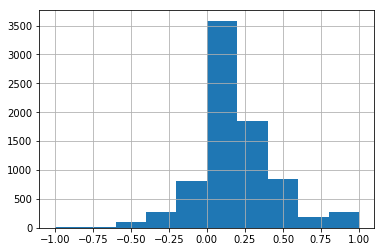

In [521]:
alltweets['Tweet_Sent'].hist()

### Using the Universal Sentence Encoder

In [14]:
cleaned = [clean_tweet(tweet) for tweet in alltweets['Text']] 
alltweets['Text'] = [tweet.replace(" amp "," and ") for tweet in cleaned] #this replaces amp (&) with and

# Import the Universal Sentence Encoder's TF Hub module

module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
embed = hub.Module(module_url)

#save the text of tweets as a list
shortlist = alltweets['Text'].tolist()
#embed the shortlist
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  shortlist_embeddings = session.run(embed(shortlist))


In [16]:
#link the embeddings to the vectors
alltweets['Embeddings'] = ""
for x in range(0,len(alltweets['Embeddings'])):
    alltweets['Embeddings'][x] = shortlist_embeddings[x]

Now, we get vectors for each list of words and run

In [18]:
# create groups of political topics

list1 = [ "immigration",
"migrant",
"mexican american",
"illegal aliens"]

list2= ["Border wall",
"Border control",
"Border security",
"asylum",
"Drug trafficking"]

list3 = ["incompetent","stupid","weak","ridiculous","loser"]

list4 = ["crime", "murder", "robbery", "criminal", "prison"]

list5 = ["metoo", "sexism", "sexual assault", "harassment", "rape"]

list6 = ["guns", "second amendment", "rifle", "machine gun", "shooter"]

list7 = ["grateful", "thanks", "thank you", "gratitude", "appreciate", "indebted"]

list8 = ["taxes", "income tax", "tax brackets", "corporate tax"]

list9 = ["healthcare", "health insurance", "obamacare", "hospital", "medical doctor"]

list10 = ["international trade", "tariffs", "exports", "NAFTA"]

list11 = ["university", "college", "tuition", "fafsa", "schools"]

list12 = ["economy", "stock market", "unemployment", "economic growth", "inflation" ]

list13 = ["global warming", "climate change", "ozone layer"]

list14 = ["community", "friendship", "teamwork", "cooperation"]

listoflists = [list1,list2,list3,list4,list5,list6,list7,list8,list9,list10,list11,list12,list13,list14]

In [19]:

embeds = list()
for list_ in listoflists:
    print(list_)
    with tf.Session() as session:
        session.run([tf.global_variables_initializer(), tf.tables_initializer()])
        vectors = session.run(embed(list_))
        embeds.append(vectors.mean(axis=0))
    

['immigration', 'migrant', 'mexican american', 'illegal aliens']
['Border wall', 'Border control', 'Border security', 'asylum', 'Drug trafficking']
['incompetent', 'stupid', 'weak', 'ridiculous', 'loser']
['crime', 'murder', 'robbery', 'criminal', 'prison']
['metoo', 'sexism', 'sexual assault', 'harassment', 'rape']
['guns', 'second amendment', 'rifle', 'machine gun', 'shooter']
['grateful', 'thanks', 'thank you', 'gratitude', 'appreciate', 'indebted']
['taxes', 'income tax', 'tax brackets', 'corporate tax']
['healthcare', 'health insurance', 'obamacare', 'hospital', 'medical doctor']
['international trade', 'tariffs', 'exports', 'NAFTA']
['university', 'college', 'tuition', 'fafsa', 'schools']
['economy', 'stock market', 'unemployment', 'economic growth', 'inflation']
['global warming', 'climate change', 'ozone layer']
['community', 'friendship', 'teamwork', 'cooperation']


In [58]:
for x in range(0, len(embeds)):
    newcol = "avg_vector"+str(x+1)
    alltweets[newcol] = ""
    avg_vector=embeds[x]
    alltweets[newcol]=[avg_vector for x in enumerate(alltweets[newcol])]
      
    nowa = datetime.datetime.now()
    newdist = "distance"+str(x+1)
    alltweets[newdist] = np.NaN
    alltweets[newdist]=[np.linalg.norm(vector-avg_vector)*-1 for x,vector in enumerate(alltweets['Embeddings'])]
    nowb = datetime.datetime.now()
    print(totalminutes(nowa, nowb))
    


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [171]:
alltweets.rename(columns={'distance1': 'immigration','distance2': 'bordersecurity','distance3': 'insults',
                          'distance4': 'crime','distance5': 'treatment of women','distance6': 'guns',
                          'distance7': 'gratitude','distance8': 'taxes','distance9': 'healthcare','distance10': 'trade',
                          'distance11': 'education','distance12': 'economy','distance13': 'global warming','distance14': 'community'}
                 , inplace=True)

Creating features on the aggregate data level

In [246]:
tweets3plus = tweetswithfeats.loc[tweetswithfeats['Comment_Count']>2]
tweets5plus = tweetswithfeats.loc[tweetswithfeats['Comment_Count']>4]

In [351]:
allusers = tweetswithfeats.groupby('User_Name').mean()

#add mean level to variable names, except user name
allusers.columns = ["Mean_"+name for name in allusers.columns]
allusers['User_Counts'] = tweetswithfeats[['Mean_Sentiment+-','User_Name']].groupby('User_Name').count()
#getting count variables
countsdf = tweetswithfeats[['Mean_Sentiment+-','User_Name']].groupby('User_Name').count()
countsdf = pd.DataFrame(countsdf['Mean_Sentiment+-']).reset_index()
countsdf.rename(columns={'Mean_Sentiment+-': 'User_Counts'},inplace=True)

allusers=pd.merge(allusers,countsdf,on="User_Name",validate="1:1")

#merging together
allusers = allusers.reset_index()
tweetswithagg = pd.merge(tweetswithfeats,allusers,on='User_Name',validate="m:1")


allusers3plus = tweets3plus.groupby('User_Name').mean()
#add mean level to variable names, except user name
allusers3plus.columns = ["Mean_"+name for name in allusers3plus.columns]

#getting count variables
countsdf = tweets3plus[['Mean_Sentiment+-','User_Name']].groupby('User_Name').count()
countsdf = pd.DataFrame(countsdf['Mean_Sentiment+-']).reset_index()
countsdf.rename(columns={'Mean_Sentiment+-': 'User_Counts'},inplace=True)

allusers3plus=pd.merge(allusers3plus,countsdf,on="User_Name",validate="1:1")

#merge
allusers3plus = allusers3plus.reset_index()
tweetswithagg3 = pd.merge(tweets3plus,allusers3plus,on='User_Name',validate="m:1")

allusers5plus = tweets5plus.groupby('User_Name').mean()
#add mean level to variable names, except user name
allusers5plus.columns = ["Mean_"+name for name in allusers5plus.columns]
allusers5plus = allusers5plus.reset_index()

#getting count variables
countsdf = tweets5plus[['Mean_Sentiment+-','User_Name']].groupby('User_Name').count()
countsdf = pd.DataFrame(countsdf['Mean_Sentiment+-']).reset_index()
countsdf.rename(columns={'Mean_Sentiment+-': 'User_Counts'},inplace=True)

allusers5plus=pd.merge(allusers5plus,countsdf,on="User_Name",validate="1:1")

#merge
tweetswithagg5 = pd.merge(tweets5plus,allusers5plus,on='User_Name',validate="m:1")


In [355]:
tweetswithagg3.describe()

,administration,affordable,am,american,americans,been,bill,but,climate,community,...,Mean_community,Mean_Swear_Comments1,Mean_Mean_Sentiment,Mean_SD_Sentiment,Mean_Mean_Sentiment+-,Mean_SD_Sentiment+-,Mean_Tweet_Sent,Mean_Weekday,Mean_Comment_Count,User_Counts
count,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,...,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000
mean,0.056652,0.041631,0.027468,0.096137,0.084979,0.041202,0.036910,0.059657,0.060086,0.027897,...,1.182497,0.305228,0.068444,0.202995,0.080690,0.214455,0.127002,2.390987,22.673391,13.932189
std,0.240332,0.214304,0.178542,0.310449,0.290965,0.213383,0.197478,0.244043,0.297108,0.177268,...,0.024738,0.165568,0.070146,0.046255,0.075285,0.052755,0.107660,0.747737,35.529863,13.021620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.042482,0.000000,-0.421212,0.000000,-0.421212,0.000000,-0.281250,0.000000,3.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.168079,0.230714,0.036837,0.180182,0.043415,0.184054,0.055556,2.000000,7.666667,5.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.181929,0.285297,0.062746,0.205260,0.079500,0.218966,0.111852,2.470588,11.500000,11.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.198071,0.332376,0.094064,0.225417,0.113527,0.242004,0.176852,2.833333,19.928571,18.000000
max,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,1.317858,1.000000,0.700000,0.506306,0.700000,0.506306,0.775000,6.000000,291.500000,68.000000


In [357]:
tweetswithagg5.describe()

,administration,affordable,am,american,americans,been,bill,but,climate,community,...,Mean_community,Mean_Swear_Comments1,Mean_Mean_Sentiment,Mean_SD_Sentiment,Mean_Mean_Sentiment+-,Mean_SD_Sentiment+-,Mean_Tweet_Sent,Mean_Weekday,Mean_Comment_Count,User_Counts
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,...,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,0.051330,0.044527,0.026592,0.096475,0.089672,0.037724,0.037724,0.064317,0.063080,0.020408,...,1.185634,0.308626,0.062032,0.220806,0.073949,0.237286,0.116048,2.372294,31.048856,12.476809
std,0.228993,0.226349,0.179135,0.313624,0.298509,0.193807,0.196974,0.252844,0.298061,0.154003,...,0.026517,0.167524,0.054790,0.042630,0.061389,0.047911,0.111945,0.806471,44.163656,12.679586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.053003,0.000000,-0.259115,0.027243,-0.259115,0.011785,-0.316667,0.000000,5.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.170408,0.235242,0.032144,0.200140,0.041370,0.211643,0.048333,1.909091,11.142857,5.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.184640,0.281033,0.060076,0.217077,0.073146,0.236644,0.108333,2.416667,15.230769,9.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.203075,0.327605,0.085714,0.243527,0.105313,0.264093,0.180015,2.833333,35.888889,15.000000
max,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.288828,1.000000,0.454554,0.453720,0.454554,0.489058,0.850000,6.000000,435.500000,61.000000


In [264]:
myseries = pd.Series(allusers5plus.corr()['Swear_Comments1'])
myseries.sort_values(ascending=False)[1:]

community             0.169329
gratitude             0.149386
if                    0.120955
full                  0.110072
americans             0.109259
public                0.103534
Comment_Count         0.098902
every                 0.092846
one                   0.086762
report                0.082879
mueller               0.081899
existing              0.079175
pre                   0.079167
continue              0.074443
protect               0.070234
why                   0.069614
he                    0.068884
house                 0.068074
but                   0.067906
day                   0.065889
am                    0.061868
president             0.060628
help                  0.059889
american              0.058520
User_Total_Tweets     0.058023
conditions            0.054366
global warming        0.052641
administration        0.046817
education             0.043770
right                 0.043728
week                  0.043210
when                  0.042050
congress

In [172]:
alltweets.describe()

,Unnamed: 0,Length,Likes,Retweets,User_Followers,User_Following,User_Total_Tweets,distance0,immigration,bordersecurity,...,global warming,community,Swear_Comments1,Mean_Sentiment,SD_Sentiment,Mean_Sentiment+-,SD_Sentiment+-,Tweet_Sent,Weekday,Comment_Count
count,7951.000000,7951.000000,7951.000000,7951.000000,7.951000e+03,7951.000000,7951.000000,7951.000000,7951.000000,7951.000000,...,7951.000000,7951.000000,7951.000000,4950.000000,4950.000000,4506.000000,4506.000000,7951.000000,7951.000000,7951.000000
mean,3975.000000,217.792605,714.160357,224.006289,1.256326e+05,2088.286253,5366.284618,1.144269,1.144269,1.140144,...,1.200393,1.165552,0.178657,0.074255,0.111402,0.091297,0.119191,0.170317,2.353792,7.060873
std,2295.400328,69.938085,5255.119620,1641.624944,4.708264e+05,3558.037833,4793.738083,0.075741,0.075741,0.068205,...,0.090381,0.058098,0.312234,0.194230,0.123636,0.221451,0.135124,0.260491,1.667664,44.143916
min,0.000000,18.000000,0.000000,0.000000,4.720000e+02,0.000000,50.000000,0.659017,0.659017,0.779389,...,0.655042,0.737412,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,1987.500000,170.000000,10.000000,2.000000,1.294600e+04,422.000000,1682.000000,1.104499,1.104499,1.104369,...,1.166129,1.133252,0.000000,-0.013906,0.000000,-0.033333,0.000000,0.000000,1.000000,0.000000
50%,3975.000000,233.000000,26.000000,7.000000,2.696000e+04,938.000000,4430.000000,1.151803,1.151803,1.142497,...,1.213183,1.170780,0.000000,0.052259,0.076549,0.085030,0.073074,0.136364,2.000000,1.000000
75%,5962.500000,277.000000,91.000000,25.000000,7.515800e+04,2489.000000,7396.000000,1.192715,1.192715,1.182845,...,1.256697,1.204476,0.267469,0.166562,0.205400,0.202818,0.223441,0.326667,4.000000,4.000000
max,7950.000000,322.000000,226605.000000,73961.000000,8.265556e+06,42546.000000,30698.000000,1.353373,1.353373,1.363388,...,1.403589,1.318486,1.000000,1.000000,0.850000,1.000000,0.900000,1.000000,6.000000,1678.000000


count    4506.000000
mean       12.459166
std        58.065337
min         1.000000
25%         2.000000
50%         3.000000
75%         8.000000
max      1678.000000
Name: Comment_Count, dtype: float64

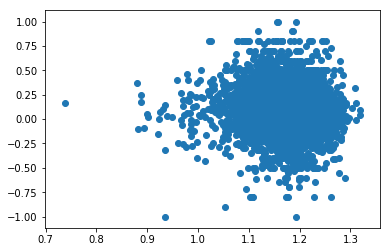

In [165]:
locs = alltweets['Comment_Count']>0
plt.scatter(alltweets['distance14'].loc[locs],alltweets['Mean_Sentiment+-'].loc[locs])
alltweets['Comment_Count'].loc[locs].describe()

### Summary and Visualization

Basic summary stats

In [30]:
totalminutes(now,datetime.datetime.now())

0.28

#### What does tweet sentiment look like

First, looking at a few random distributions of comments. How do comments vary for individual tweets?

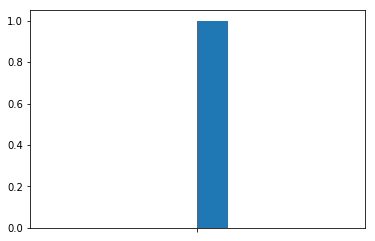

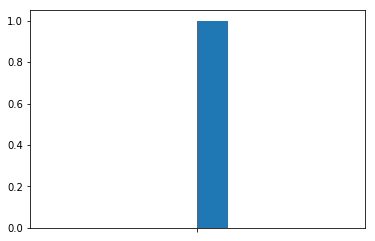

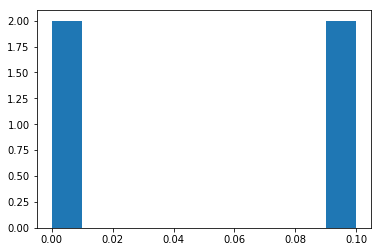

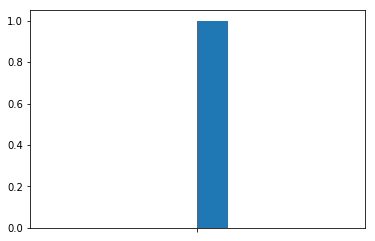

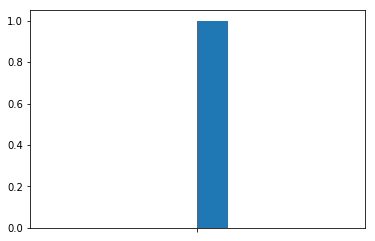

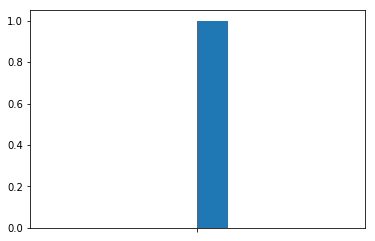

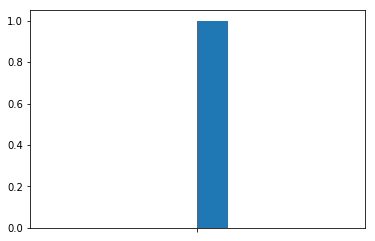

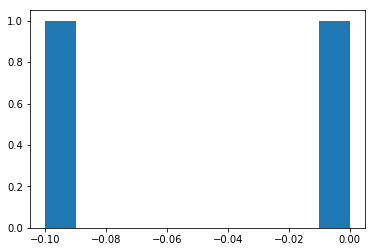

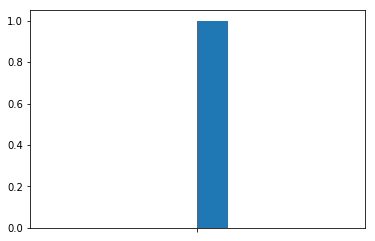

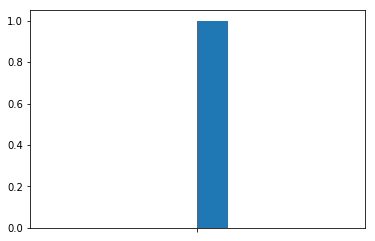

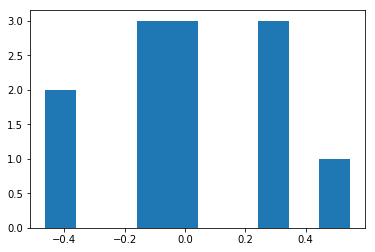

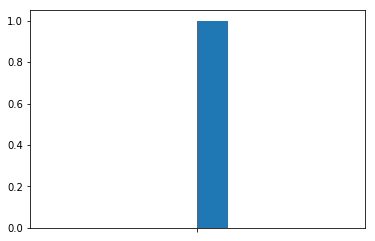

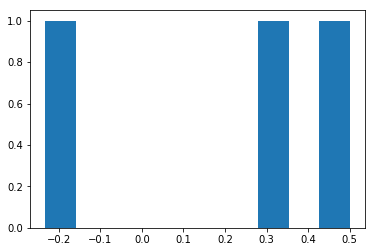

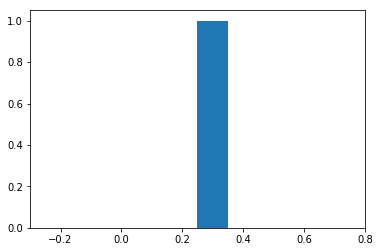

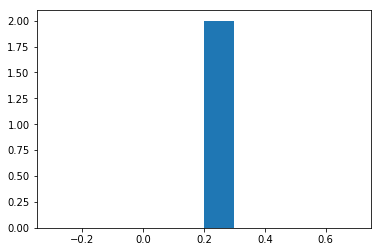

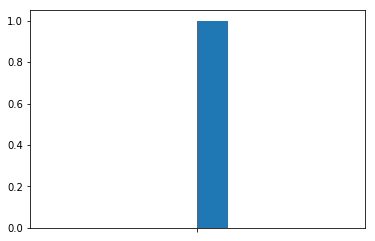

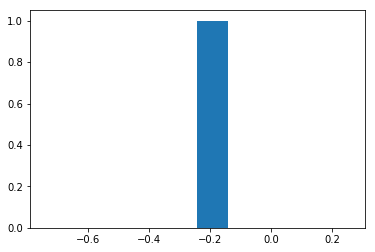

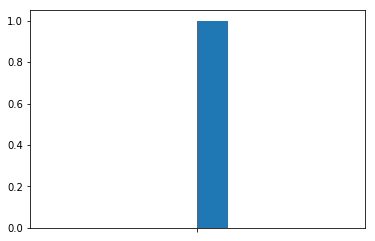

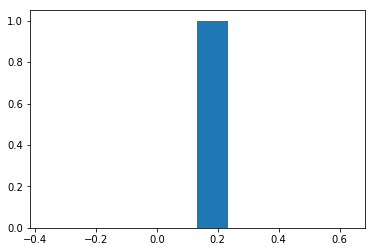

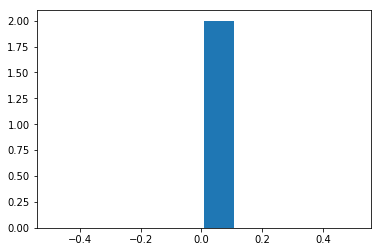

In [320]:
seeds = np.random.randint(len(alltweets['Sent_dists']),size=20)

for x in seeds:
    plt.figure()
    plt.hist(alltweets['Sent_dists'][x]) #may want to update number of bins

Looking at the distributions for individual users

In [336]:
users = alltweets['User_Name'].unique()
seeds = np.random.randint(len(users),size=10)

for x in seeds:
    plt.figure()
    plt.hist(alltweets.loc(alltweets['User_Name']==x,['Mean_Sentiment'])
    plt.figure()
    plt.hist(alltweets.loc(alltweets['User_Name']==x,['Mean_Sentiment+-'])


TypeError: 'Series' objects are mutable, thus they cannot be hashed

<Figure size 432x288 with 0 Axes>

,Mean_Sentiment+-,Swear_Comments1,SD_Sentiment+-,User_Total_Tweets,User_Following,User_Followers,Likes,Retweets,Tweet_Sent,%retweet,Counts,logretweet,logfollowers
Mean_Sentiment+-,1.000000,-0.123686,-0.149727,-0.025466,-0.025492,-0.083187,-0.091278,-0.093251,0.161169,-0.095313,0.012891,-0.122364,-0.112225
Swear_Comments1,-0.123686,1.000000,0.438488,0.239301,0.074434,0.098445,0.062750,0.055834,-0.176417,0.043535,0.065376,0.327537,0.376195
SD_Sentiment+-,-0.149727,0.438488,1.000000,0.270065,0.081044,0.258579,0.239086,0.239568,-0.291817,0.182124,0.091752,0.654421,0.565066
User_Total_Tweets,-0.025466,0.239301,0.270065,1.000000,0.318875,0.291721,0.117547,0.117077,-0.210250,-0.130433,0.445694,0.274022,0.609738
User_Following,-0.025492,0.074434,0.081044,0.318875,1.000000,0.063617,0.067876,0.068107,-0.166287,-0.051004,0.080751,0.136817,0.244639
User_Followers,-0.083187,0.098445,0.258579,0.291721,0.063617,1.000000,0.388523,0.381335,-0.175773,-0.001951,-0.013099,0.434280,0.525174
Likes,-0.091278,0.062750,0.239086,0.117547,0.067876,0.388523,1.000000,0.996589,-0.212656,0.247754,-0.083945,0.568872,0.419981
Retweets,-0.093251,0.055834,0.239568,0.117077,0.068107,0.381335,0.996589,1.000000,-0.215459,0.267380,-0.081401,0.572898,0.416910
Tweet_Sent,0.161169,-0.176417,-0.291817,-0.210250,-0.166287,-0.175773,-0.212656,-0.215459,1.000000,-0.014374,-0.102740,-0.348319,-0.290954
%retweet,-0.095313,0.043535,0.182124,-0.130433,-0.051004,-0.001951,0.247754,0.267380,-0.014374,1.000000,-0.088746,0.374372,-0.031401


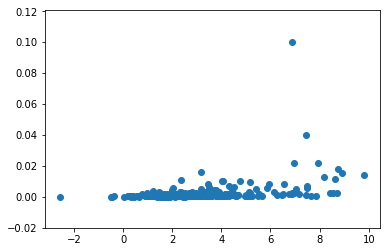

In [531]:
lessnoise = userlevel.loc[userlevel['Counts']>10]
plt.scatter(lessnoise['logretweet'],lessnoise['%retweet'].replace(0,np.NaN))
lessnoise.corr()

Looking at histograms for everything

(array([2.059e+03, 7.900e+01, 8.200e+01, 1.070e+02, 9.400e+01, 1.310e+02,
        1.130e+02, 1.490e+02, 1.420e+02, 1.230e+02, 1.380e+02, 1.400e+02,
        1.590e+02, 1.320e+02, 1.500e+02, 1.720e+02, 1.450e+02, 1.340e+02,
        1.090e+02, 1.150e+02, 7.600e+01, 6.700e+01, 4.600e+01, 4.200e+01,
        4.500e+01, 3.500e+01, 2.800e+01, 2.500e+01, 1.600e+01, 1.900e+01,
        1.300e+01, 1.800e+01, 9.000e+00, 7.000e+00, 6.000e+00, 8.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.01416667, 0.02833333, 0.0425    , 0.05666667,
        0.07083333, 0.085     , 0.09916667, 0.11333333, 0.1275    ,
        0.14166667, 0.15583333, 0.17      , 0.18416667, 0.19833333,
        0.2125    , 0.22666667, 0.24083333, 0.255     

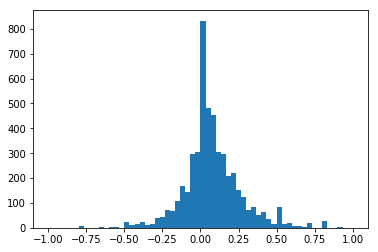

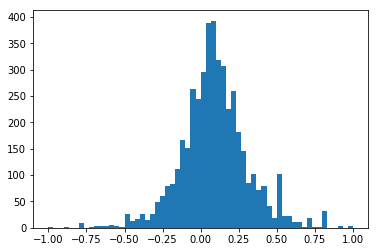

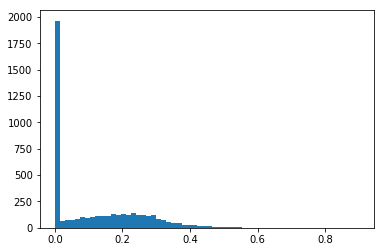

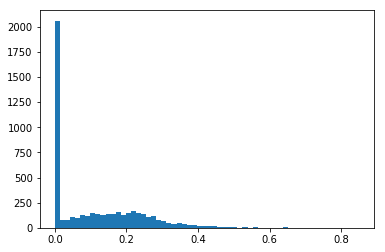

In [342]:
plt.figure()
plt.hist(alltweets['Mean_Sentiment'], bins=60)
plt.figure()
plt.hist(alltweets['Mean_Sentiment+-'], bins=60)
plt.figure()
plt.hist(alltweets['SD_Sentiment+-'], bins=60)
plt.figure()
plt.hist(alltweets['SD_Sentiment'], bins=60)

Looking at histograms for group means.

The first is a histogram of log-transformed count variables (how many tweets each user had)

(array([ 17.,  14.,  16.,  46.,  88., 116.,  94.,  89.,  29.,   3.]),
 array([0.        , 0.44659081, 0.89318162, 1.33977244, 1.78636325,
        2.23295406, 2.67954487, 3.12613568, 3.57272649, 4.01931731,
        4.46590812]),
 <a list of 10 Patch objects>)

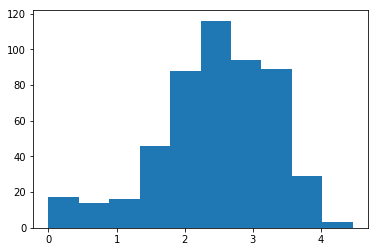

In [483]:
plt.hist(np.log(userlevel['Counts']))

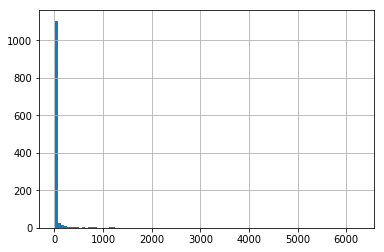

In [111]:
mylist = list()
for x in range(0, len(tweets['Comments'])):
    mylist.append(len(tweets['Comments'][x]))
pd.Series(mylist).hist(bins=100)

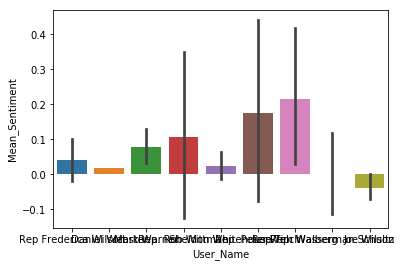

In [464]:
#Various user names and how sentiment varies
sns.barplot(alltweets.iloc[150:300]['User_Name'],alltweets.iloc[150:300]['Mean_Sentiment'])


In [ ]:
alltweets[['Mean_Sentiment+-','SD_Sentiment+-','Swear_Comments1','distance1','distance2','distance3','distance4','distance5',
          'distance6','distance7','distance8','distance9','distance10','distance11','distance12','distance13','distance14']].corr()

In [364]:
numeric_stuff = tweetswithfeats.select_dtypes(include=["float64","int64"])
numeric_stuff = numeric_stuff[numeric_stuff['Mean_Sentiment'].isnull()==False]
from sklearn.preprocessing import StandardScaler as sdscale
scaler =sdscale()
scaler.fit(numeric_stuff)
std_features = pd.DataFrame(scaler.transform(numeric_stuff))
std_features.columns=numeric_stuff.columns
target = std_features['User_Following']
std_features = std_features.drop(columns=dvs)

C:\Users\jmoore42\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jmoore42\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


KeyError: "['Swear_Count2' 'Swear_Count1'] not found in axis"

In [523]:
myseries = pd.Series(numeric_stuff.corr()['SD_Sentiment+-'])
myseries.sort_values(ascending=False)[1:]

SD_Sentiment         0.935624
User_Total_Tweets    0.146371
User_Followers       0.125149
Retweets             0.125138
Likes                0.124021
democrats            0.072235
User_Following       0.064178
no                   0.060024
get                  0.054835
mueller              0.054127
would                0.052443
americans            0.051819
pre                  0.042856
existing             0.042653
special              0.042592
or                   0.041975
he                   0.041599
senate               0.039850
climate              0.038753
president            0.038602
report               0.036742
conditions           0.030017
american             0.029694
time                 0.028667
Swear_Comments2      0.028501
than                 0.028387
if                   0.027322
make                 0.026331
right                0.025102
take                 0.024932
                       ...   
so                  -0.016141
first               -0.016577
national  

## Modeling

In [202]:
distancevars = alltweets[['Tweet_Sent','Retweets','immigration','bordersecurity','crime','guns', 'taxes','healthcare','trade',
                          'education','economy','global warming','Mean_Sentiment+-']].loc[alltweets['Comment_Count']>2]

In [203]:
distancevars = distancevars[distancevars['Mean_Sentiment+-'].isnull()==False]
from sklearn.preprocessing import StandardScaler as sdscale
scaler =sdscale()
scaler.fit(distancevars)
std_features = pd.DataFrame(scaler.transform(distancevars))
std_features.columns=distancevars.columns
target = std_features['Mean_Sentiment+-']
std_features = std_features.drop(columns=['Mean_Sentiment+-'])

In [204]:
from sklearn.linear_model import ElasticNetCV

# l1 ratio of zero is l2 and visa-versa 
# alphas are how much to weight regularization
clf = ElasticNetCV(l1_ratio=[.01], alphas=[.3], cv=5, tol=10**-5)
clf.fit(std_features, target)
train_predictions = clf.predict(std_features)
print(clf.mse_path_.mean())
print(clf.alpha_)
print(clf.l1_ratio_)
clf.score(std_features, target)

0.9742238200238447
0.3
0.01


0.03246656820374738

In [205]:
clf.coef_

array([ 0.0868222 , -0.020409  ,  0.01869121,  0.03880659,  0.0431411 ,
       -0.00815139,  0.01584164, -0.00613178,  0.        , -0.05014382,
        0.01485338,  0.01344614])

In [206]:
std_features.columns

Index(['Tweet_Sent', 'Retweets', 'immigration', 'bordersecurity', 'crime',
       'guns', 'taxes', 'healthcare', 'trade', 'education', 'economy',
       'global warming'],
      dtype='object')

In [359]:
tweetswithagg.to_csv(r"C:\Users\jmoore42\Documents\politcian_data_withagg.csv")

In [360]:
tweetswithagg5.to_csv(r"C:\Users\jmoore42\Documents\politcian_data_withagg5.csv")